<a href="https://colab.research.google.com/github/aaryachinnawar/Calculator-website/blob/main/EvaluationMetrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("customer_churn.csv")


In [ ]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [ ]:
from sklearn.model_selection import train_test_split


features = data[['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites']]
target = data['Churn']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


missing_values = data.isnull().sum()


(X_train.shape, X_test.shape), missing_values


(((720, 5), (180, 5)),
 Names              0
 Age                0
 Total_Purchase     0
 Account_Manager    0
 Years              0
 Num_Sites          0
 Onboard_date       0
 Location           0
 Company            0
 Churn              0
 dtype: int64)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_y_pred = log_reg.predict(X_test)


In [ ]:
def print_classification_metrics(model_name, y_true, y_pred):
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

print_classification_metrics("Logistic Regression", y_test, log_y_pred)
print_classification_metrics("Random Forest Classifier", y_test, rf_y_pred)

Logistic Regression Metrics:
Accuracy: 0.90
Precision: 0.77
Recall: 0.62
F1 Score: 0.69
Confusion Matrix:
[[142   6]
 [ 12  20]]


Random Forest Classifier Metrics:
Accuracy: 0.87
Precision: 0.74
Recall: 0.44
F1 Score: 0.55
Confusion Matrix:
[[143   5]
 [ 18  14]]




In [ ]:
# ROC-AUC for classification
log_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print(f"Logistic Regression ROC-AUC: {log_roc_auc:.2f}")
print(f"Random Forest Classifier ROC-AUC: {rf_roc_auc:.2f}")

Logistic Regression ROC-AUC: 0.90
Random Forest Classifier ROC-AUC: 0.88


In [ ]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
lr_probs = log_reg.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# Random Forest Classifier
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

<ipython-input-26-e8cd384dbb46>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="No Skill Line", color="red")


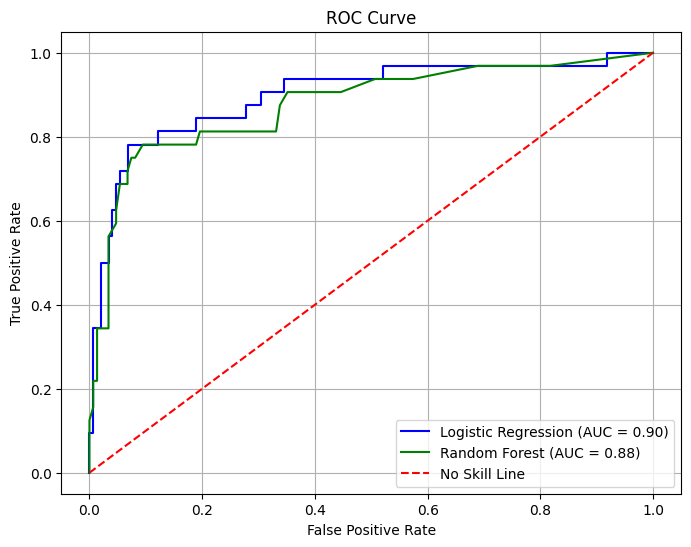

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", color="blue")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], 'k--', label="No Skill Line", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()



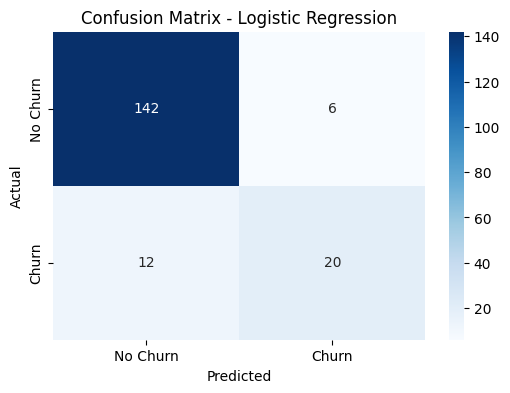

In [ ]:
lr_preds = log_reg.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

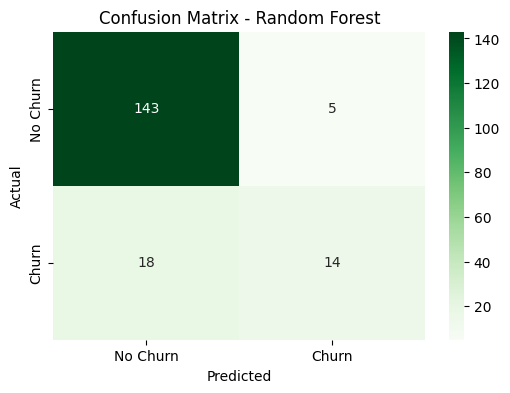

In [ ]:
# Random Forest Confusion Matrix
rf_preds = rf_clf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:

# Regression: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_y_pred = lin_reg.predict(X_test)


# Regression: Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)

In [ ]:
# Regression Metrics
def print_regression_metrics(model_name, y_true, y_pred):
    print(f"{model_name} Metrics:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("\n")

print_regression_metrics("Linear Regression", y_test, lin_y_pred)

Linear Regression Metrics:
MAE: 0.24
MSE: 0.10
RMSE: 0.32


